# COGS 108 - Most Important Characteristics for UCSD Transfer Admission

### Project Video Link: https://drive.google.com/file/d/1-3vTpAn7zpk6xdswfcMtiw73xIjglUfD/view?usp=sharing

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

In our research we seek out what metrics a transfer student can have (such as their gender, ethnicity, residency, gpa etc) that gives the highest chance to get into a University of California and we want to see how exactly this trend has changed throughout the years. To answer this question we gathered the public data on transfer admissions from the University of California’s website from the past 27 years, and with this data we will plot out visualizations on how the acceptance percentage of every sub category has changed over time. Then to give a more concrete value of how much it actually changed we will run a stationary test on each subcategory.  Collectively with all this information we were able to determine that people with a high gpa and lived in California, had the best odds of getting into a University of California.

# Names

- Maxwell Jung
- Lazar Nikolic
- Peter Hattendorf

## Background

As each year passes college admissions are getting more and more competitive.From getting fantastic grades, to running clubs students now are doing more than ever to even get the chance of going to a good school. So what plays the biggest role in getting into one? What increases your odds of getting in? That's what we would like to figure out.

<a id='research_question'></a>
# Research Question

Which student metrics (gender, gpa, ethnicity, first generation status, residency status) are most highly correlated with a higher chance of admission to UC for any given transfer student, and is this changing over time?

# Dataset

- Dataset Name: University of California Transfer Fall Admissions
- Link to the dataset: https://www.universityofcalifornia.edu/infocenter/transfer-admissions-summary
- Number of observations: 27 years of data - from 1994 to 2020

This dataset gives us the number of students admitted and number of students who applied for each year from 1994 to 2020, separated by different demographic information:
- Residency
- First generation college student status
- Ethnicity
- Transfer gpa
- Gender

# Setup

Here we take all of the csv files from our data folder and load them into pandas dataframes

In [1]:
import pandas as pd

totals_data = pd.read_csv('data/totals_data.csv', header=[1])

residency_data = pd.read_csv('data/residency_data.csv', header=[1])

first_generation_data = pd.read_csv('data/first_generation_data.csv', header=[1])

ethnicity_data = pd.read_csv('data/ethnicity_data.csv', header=[1])

transfer_gpa_data = pd.read_csv('data/transfer_gpa_data.csv', header=[1])

gender_data = pd.read_csv('data/gender_data.csv', header=[1])






# Data Cleaning

Our source for data did not allow for us to download the data directly, so as a result we manually entered the data into google sheets then downloaded csv files for each table, so we formatted the data and cleaned it when manually entering it, to ensure tidy format. 

However, here we did add a percent acceptance column for each dataframe as well as a percentage of admissions column.

In [2]:
#add totals acceptance %
totals_data['total_percent'] = totals_data['total_admits'] / totals_data['total_applicants']

#add residency acceptance %s
residency_data['california_resident_percent'] = residency_data['california_resident_admits'] / residency_data['california_resident_applicants']
residency_data['non-california_resident_percent'] = residency_data['non-california_resident_admits'] / residency_data['non-california_resident_applicants']
residency_data['international_res_percent'] = residency_data['international_admits'] / residency_data['international_applicants']

#add first gen acceptance %s
first_generation_data['first_generation_percent'] = first_generation_data['first_generation_admits'] / first_generation_data['first_generation_applicants']
first_generation_data['non_first_generation_percent'] = first_generation_data['non_first_generation_admits'] / first_generation_data['non_first_generation_applicants']
first_generation_data['unknown_percent'] = first_generation_data['unknown_admits'] / first_generation_data['unknown_applicants']

#add ethnicity acceptance %s
ethnicity_data['chicano/latino_percent'] = ethnicity_data['chicano/latino_admits'] / ethnicity_data['chicano/latino_applicants']
ethnicity_data['african_american_percent'] = ethnicity_data['african_american_admits'] / ethnicity_data['african_american_applicants']
ethnicity_data['american_indian_percent'] = ethnicity_data['american_indian_admits'] / ethnicity_data['american_indian_applicants']
ethnicity_data['asian_pacific_islander_percent'] = ethnicity_data['asian_pacific_islander_admits'] / ethnicity_data['asian_pacific_islander_applicants']
ethnicity_data['white_percent'] = ethnicity_data['white_admits'] / ethnicity_data['white_applicants']
ethnicity_data['international_percent'] = ethnicity_data['international_admits'] / ethnicity_data['international_applicants']
ethnicity_data['other/unknown_percent'] = ethnicity_data['other/unknown_admits'] / ethnicity_data['other/unknown_applicants']

#add transfer gpa acceptance %s
transfer_gpa_data['0.00-2.39_percent'] = transfer_gpa_data['0.00-2.39_admits'] / transfer_gpa_data['0.00-2.39_applicants']
transfer_gpa_data['2.40-2.79_percent'] = transfer_gpa_data['2.40-2.79_admits'] / transfer_gpa_data['2.40-2.79_applicants']
transfer_gpa_data['2.80-3.19_percent'] = transfer_gpa_data['2.80-3.19_admits'] / transfer_gpa_data['2.80-3.19_applicants']
transfer_gpa_data['3.20-3.59_percent'] = transfer_gpa_data['3.20-3.59_admits'] / transfer_gpa_data['3.20-3.59_applicants']
transfer_gpa_data['3.60-4.00_percent'] = transfer_gpa_data['3.60-4.00_admits'] / transfer_gpa_data['3.60-4.00_applicants']
transfer_gpa_data['unknown-missing_percent'] = transfer_gpa_data['unknown-missing_admits'] / transfer_gpa_data['unknown-missing_applicants']

#add gender acceptance %s
gender_data['unknown_percent'] = gender_data['unknown_admits'] / gender_data['unknown_applicants']
gender_data['female_percent'] = gender_data['female_admits'] / gender_data['female_applicants']
gender_data['male_percent'] = gender_data['male_admits'] / gender_data['male_applicants']

#here we add another column for percentage of admits as opposed to percentage acceptance.

#residency percentages
residency_data['california_resident_percent_total'] = residency_data['california_resident_admits'] / totals_data['total_admits']
residency_data['non-california_resident_percent_total'] = residency_data['non-california_resident_admits']/totals_data['total_admits']
residency_data['international_res_percent_total'] = residency_data['international_admits'] / totals_data['total_admits']

#first gen percentages
first_generation_data['first_generation_percent_total'] = first_generation_data['first_generation_admits']/totals_data['total_admits']
first_generation_data['non_first_generation_percent_total'] = first_generation_data['non_first_generation_admits']/totals_data['total_admits']
first_generation_data['unknown_percent_total'] = first_generation_data['unknown_admits'] /totals_data['total_admits']

#ethnicity percentages
ethnicity_data['chicano/latino_percent_total'] = ethnicity_data['chicano/latino_admits'] /totals_data['total_admits']
ethnicity_data['african_american_percent_total'] = ethnicity_data['african_american_admits'] /totals_data['total_admits']
ethnicity_data['american_indian_percent_total'] = ethnicity_data['american_indian_admits'] / totals_data['total_admits']
ethnicity_data['asian_pacific_islander_percent_total'] = ethnicity_data['asian_pacific_islander_admits'] /totals_data['total_admits']
ethnicity_data['white_percent_total'] = ethnicity_data['white_admits'] /totals_data['total_admits']
ethnicity_data['international_percent_total'] = ethnicity_data['international_admits'] /totals_data['total_admits']
ethnicity_data['other/unknown_percent_total'] = ethnicity_data['other/unknown_admits'] /totals_data['total_admits']

#transfer percentages
transfer_gpa_data['0.00-2.39_percent_total'] = transfer_gpa_data['0.00-2.39_admits'] /totals_data['total_admits']
transfer_gpa_data['2.40-2.79_percent_total'] = transfer_gpa_data['2.40-2.79_admits'] /totals_data['total_admits']
transfer_gpa_data['2.80-3.19_percent_total'] = transfer_gpa_data['2.80-3.19_admits'] /totals_data['total_admits']
transfer_gpa_data['3.20-3.59_percent_total'] = transfer_gpa_data['3.20-3.59_admits'] /totals_data['total_admits']
transfer_gpa_data['3.60-4.00_percent_total'] = transfer_gpa_data['3.60-4.00_admits'] /totals_data['total_admits']
transfer_gpa_data['unknown-missing_percent_total'] = transfer_gpa_data['unknown-missing_admits'] /totals_data['total_admits']

#gender percentages
gender_data['unknown_percent_total'] = gender_data['unknown_admits'] /totals_data['total_admits']
gender_data['female_percent_total'] = gender_data['female_admits'] /totals_data['total_admits']
gender_data['male_percent_total'] = gender_data['male_admits'] / totals_data['total_admits']







# Data Preview

General graphs to get a feel for which variables appear to increase the acceptance rate the most.

#### Totals Data

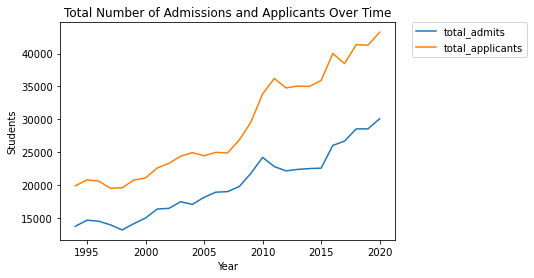

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#here are two functions that help transform the data for graphing later
def pivot_data_years(data):
    df = data.copy()
    percent_cols = [col for col in df.columns if 'percent' in col]
    df.drop(percent_cols, 1, inplace = True)
    df = df.melt(id_vars="year")
    return df

def get_percent_cols(data):
    df = data.copy()
    percent_cols = [col for col in df.columns if (('percent' in col) or ('year' in col)) and not ('percent_total' in col)]
    df.drop(df.columns.difference(percent_cols), 1, inplace=True)
    df = df.melt(id_vars="year")
    return df

#overall view of our variables over time
totals_data_trend = pivot_data_years(totals_data)
ax = sns.lineplot(data = totals_data_trend, x = "year", y = "value", hue = "variable")
ax.set(xlabel='Year', ylabel='Students', title='Total Number of Admissions and Applicants Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In general, as we already knew, total applications to UCSD has skyrocketed in recent years, and total admissions has increased with it.

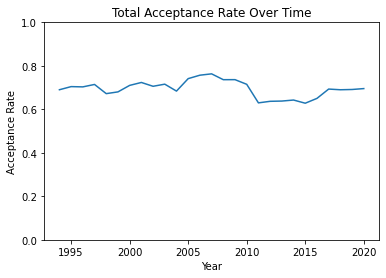

In [4]:
#as a percentage
plt.ylim(0, 1)

ax = sns.lineplot(data = totals_data, x = "year", y = "total_percent")
ax.set(xlabel='Year', ylabel='Acceptance Rate', title='Total Acceptance Rate Over Time')
plt.show()

Despite Large increases in applications, the acceptance rate has stayed fairly steady at around 70%.

#### Residency Data

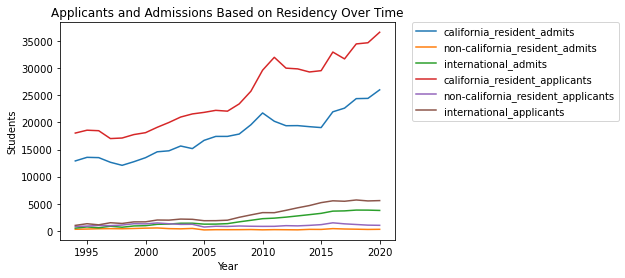

In [5]:
res_data_trend = pivot_data_years(residency_data)
ax = sns.lineplot(data = res_data_trend, x = "year", y = "value", hue = "variable")
ax = ax.set(xlabel='Year', ylabel='Students', title='Applicants and Admissions Based on Residency Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Here we see the vast majority of applications are from California residents, followed by international students, and finally students from other states.

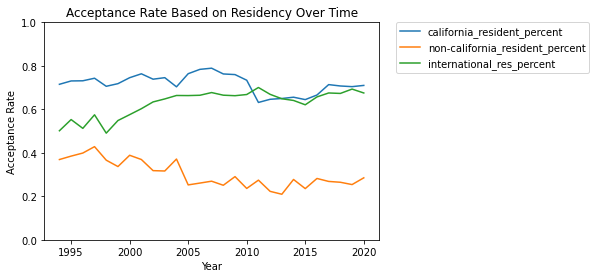

In [6]:
#as a percentage
res_percent = get_percent_cols(residency_data)

plt.ylim(0, 1)
ax = sns.lineplot(data = res_percent, x = "year", y = "value", hue = "variable")
ax.set(xlabel='Year', ylabel='Acceptance Rate', title='Acceptance Rate Based on Residency Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Here we see that the acceptance rate is higher for California residents and for international students, with international acceptance getting much closer to California resident acceptance in recent years. Non-Californian resident acceptance is fairly low compared to the other two, although they also have a much lower total number of applicants.

#### First Generation Data

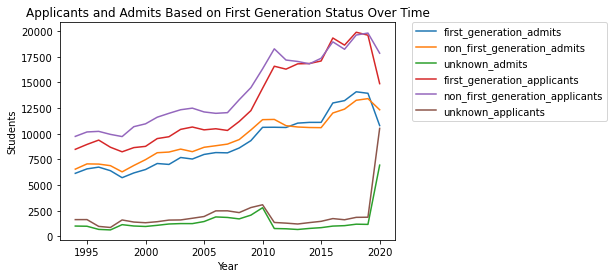

In [7]:
fg_data_trend = pivot_data_years(first_generation_data)
ax = sns.lineplot(data = fg_data_trend, x = "year", y = "value", hue = "variable")
ax.set(xlabel='Year', ylabel='Students', title='Applicants and Admits Based on First Generation Status Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Surprisingly, there are about as many first generation applicants as there are non-first generation applicants, and the number of admits for both appear close as well. Of note, there has been a large dip in first generation admits starting in 2019.

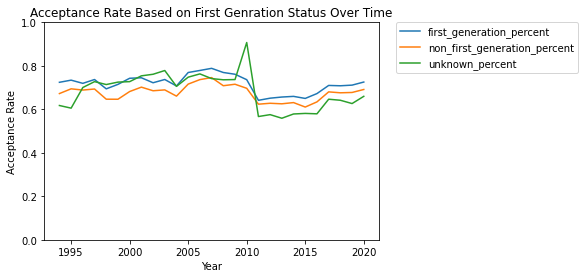

In [8]:
#as a percentage
fg_percent = get_percent_cols(first_generation_data)

plt.ylim(0, 1)
ax = sns.lineplot(data = fg_percent, x = "year", y = "value", hue = "variable")
ax.set(xlabel='Year', ylabel='Acceptance Rate', title='Acceptance Rate Based on First Genration Status Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Here we can confirm that the acceptance rate has remained largely the same for all groups regardless of their first generation status.

#### Ethnicity Data

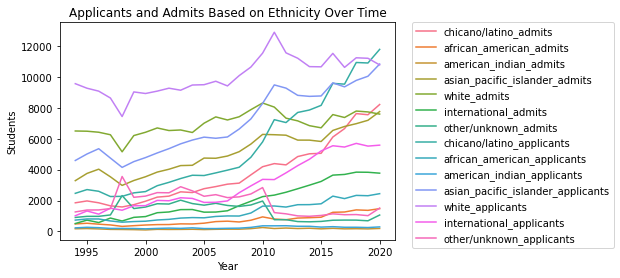

In [9]:
eth_data_trend = pivot_data_years(ethnicity_data)
ax = sns.lineplot(data = eth_data_trend, x = "year", y = "value", hue = "variable")
ax.set(xlabel='Year', ylabel='Students', title='Applicants and Admits Based on Ethnicity Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Of note here, most of all the groups have increased in applicants, with white applicants staying steadily at the largest number of applicants up to the last few years, where asian and pcific islander applicants has caught up.

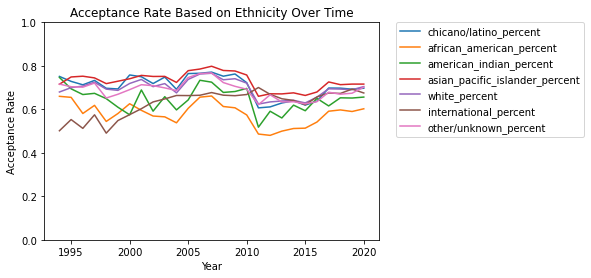

In [10]:
#as a percentage
eth_percent = get_percent_cols(ethnicity_data)

plt.ylim(0, 1)
ax = sns.lineplot(data = eth_percent, x = "year", y = "value", hue = "variable")
ax.set(xlabel='Year', ylabel='Acceptance Rate', title='Acceptance Rate Based on Ethnicity Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Here we see despite the large variation in number of applicants, the total acceptance rate for each group is relatively similar, with only African American and American Indian acceptance rates lagging slightly below the rest.

#### Transfer GPA Data

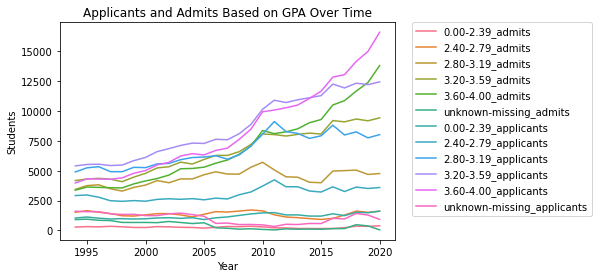

In [11]:
gpa_data_trend = pivot_data_years(transfer_gpa_data)
ax = sns.lineplot(data = gpa_data_trend, x = "year", y = "value", hue = "variable")
ax.set(xlabel='Year', ylabel='Students', title='Applicants and Admits Based on GPA Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Here it is interesting that the number of applicants and admits has increased for the higher GPAs while the medium and lower GPAs have stayed relatively stable. This might signify an increase in competition to get into UCSD, as well as it gaining more notoriety as a top school in California.

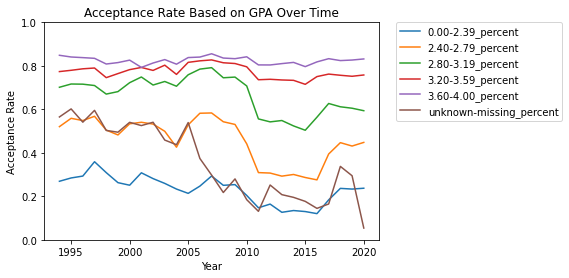

In [12]:
#as a percentage
gpa_percent = get_percent_cols(transfer_gpa_data)

plt.ylim(0, 1)
ax = sns.lineplot(data = gpa_percent, x = "year", y = "value", hue = "variable")
ax.set(xlabel='Year', ylabel='Acceptance Rate', title='Acceptance Rate Based on GPA Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Despite increasing numbers of certain groups, total acceptance rates have stayed steady, with one dip in the middle GPA levels from 2010 to 2015.

#### Gender Data

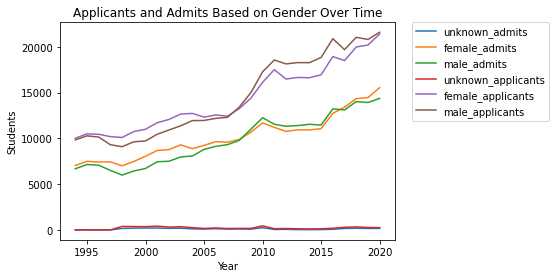

In [13]:
gender_data_trend = pivot_data_years(gender_data)
ax = sns.lineplot(data = gender_data_trend, x = "year", y = "value", hue = "variable")
ax.set(xlabel='Year', ylabel='Students', title='Applicants and Admits Based on Gender Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Over time, both female and male applicants and admissions has stayed relativley similar, with a slight increase in male applicants over female applicants from 2010 to 2017.

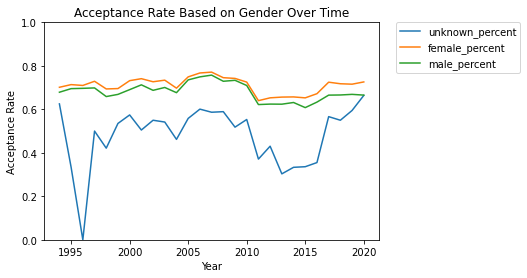

In [14]:
#as a percentage
gender_percent = get_percent_cols(gender_data)

plt.ylim(0, 1)
ax = sns.lineplot(data = gender_percent, x = "year", y = "value", hue = "variable")
ax.set(xlabel='Year', ylabel='Acceptance Rate', title='Acceptance Rate Based on Gender Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Surprisingly, the acceptance rate has been very slightly higher for females, though both have been very similar. Also note, the large fluctuation in unknown percentage is because there are less than 100 applicants in that category each year.

# Data Analysis

To answer the first part of the question "Which student metrics are most highly correlated with a higher chance of admission", we can begin by taking averages over time and see which categories have the highest overall acceptance rates.

In [15]:
#combine all the data and grab only acceptance percentages
all_data = pd.concat([residency_data, first_generation_data.drop('year',axis=1),
                      ethnicity_data.drop('year',axis=1), transfer_gpa_data.drop('year',axis=1), gender_data.drop('year',axis=1)],
                     axis=1, ignore_index=False)

percent_cols = [col for col in all_data.columns if (('percent' in col) or ('year' in col)) and not (('percent_total' in col) or ('unknown' in col))]
all_data.drop(all_data.columns.difference(percent_cols), 1, inplace=True)

In [16]:
averages = pd.DataFrame(all_data.mean(axis=0), columns = ['average'])
averages.reset_index(level=0, inplace=True)
averages.rename(columns={'index':'category'}, inplace = True)
averages.drop(0, axis=0, inplace = True)
averages.sort_values(by='average', ascending = False)

,category,average
16,3.60-4.00_percent,0.824566
15,3.20-3.59_percent,0.773402
9,asian_pacific_islander_percent,0.729624
4,first_generation_percent,0.717401
1,california_resident_percent,0.717180
17,female_percent,0.710759
6,chicano/latino_percent,0.705601
10,white_percent,0.696865
18,male_percent,0.680989
5,non_first_generation_percent,0.676267


Here we can get a general idea that the acceptance rates of high GPAs have a very large impact on admission rates, and low GPA also decreases the acceptance rate by a large margin. 

Our next goal is to determine which characteristics of an applicant gives them the best chances at admission. Given this, we believe a repeated measures ANOVA test will do the best job of determining if there is a significant difference for any of the different categories recieving higher acceptance rate. Our data should satisfy the assumptions for an ANOVA test given that we are using population data rather than sample data.

Our null hypothesis for the ANOVA test is that all the categories should be equal, and our alternate hypothesis is that they are not.

In [17]:
%%capture
!pip install pingouin;

import pingouin as pg

In [18]:
from statsmodels.stats.anova import AnovaRM

all_data_long = pd.melt(all_data,id_vars=['year'],var_name='category', value_name='acceptance_pct')

res = pg.rm_anova(dv='acceptance_pct', within='category', subject='year', data=all_data_long, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,np2,eps
0,category,10.873017,17,0.639589,390.443124,1.191074e-253,0.937567,0.123975
1,Error,0.724045,442,0.001638,NaN,NaN,NaN,NaN


The ANOVA test confirms that there is in fact significant difference between the different categories of applicants, with an F value of 390 which translates to a p value of essentially 0. Thus, we can reject the null hypothesis.

Then, we can again refer to our table of average acceptance rate, which appears to denote GPA as the most important factor in determining acceptance percentage, which makes sense.


Now, to answer the second part of the question, "how has this changed over time", we can note that the overall totals data shows a generaly stable acceptance percentage around 70, so we can run a Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to see which categories of applicants are stationary or not, which can point to which variables are increasing or decreasing over time because if they aren't also stationary they would be deviating from the overall trend.

In [19]:
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings('ignore')

def stationary_test(col_name):
    stat, p, lags, crit = kpss(all_data[col_name])
    print('\nStationary test for ' + col_name)
    print('stat=%.3f, p=%.3f' % (stat, p))

stat, p, lags, crit = kpss(totals_data['total_percent'])
print('\nStationary test for Total Percentage')
print('stat=%.3f, p=%.3f' % (stat, p))    
    
for col_name in all_data.columns:
    if (col_name != 'year'):
        stationary_test(col_name)



Stationary test for Total Percentage
stat=0.211, p=0.100

Stationary test for california_resident_percent
stat=0.245, p=0.100

Stationary test for non-california_resident_percent
stat=0.346, p=0.100

Stationary test for international_res_percent
stat=0.361, p=0.094

Stationary test for first_generation_percent
stat=0.224, p=0.100

Stationary test for non_first_generation_percent
stat=0.191, p=0.100

Stationary test for chicano/latino_percent
stat=0.274, p=0.100

Stationary test for african_american_percent
stat=0.295, p=0.100

Stationary test for american_indian_percent
stat=0.311, p=0.100

Stationary test for asian_pacific_islander_percent
stat=0.239, p=0.100

Stationary test for white_percent
stat=0.216, p=0.100

Stationary test for international_percent
stat=0.361, p=0.094

Stationary test for 0.00-2.39_percent
stat=0.327, p=0.100

Stationary test for 2.40-2.79_percent
stat=0.318, p=0.100

Stationary test for 2.80-3.19_percent
stat=0.293, p=0.100

Stationary test for 3.20-3.59_perc

After our tests, none of our different categories are significant with p values of well over .05, and therefore are all stationary. This means that in general the acceptance rates per each category have generally stayed the same over time, even if there are fluctuations.

# Ethics & Privacy

The data we gathered for applicants from the public UC website was 100% anonymous, so as a result our research uses no names to identify any of the applicants or admits, so it is completely secure in terms of privacy. On the other hand, one thing we should definitely be thinking about as we look at our work is how much of an impact does privilege play in our data? College is super expensive, so as a result a lot of people who are not as financially well off, but are very well qualified might not be able to afford going and are thus deterred from applying or even worse they make it in but can’t commit to going because there is not enough financial aid. As a result the applicants in the race category might be skewed to those that are the most financially stable to go to college. Similarly if you are financially well off and don’t have to work while you are in community college it makes it a lot easier to maintain a higher GPA which then plays a massive role (if not the biggest) for getting into a University of California. While it's not covered in the data we have, when you apply to a University of California they do ask how many hours you work, extra curricular, and other types of extraneous circumstances that impact your life as well as personal essays. These all help play a small role in minimizing these privileges to some degree, but it still plays a massive role in admissions unfortunately. However this is out of our control so we just hope the University of California’s efforts to minimize it are enough.

# Conclusion & Discussion

After examining our data, we have determined that the answers to our orignial questions are that:

- There is a significant difference between categories in determing acceptance rate, and that GPA is the largest determining factor towards increasing acceptance rate in our data.
- There hasn't been significant change over time in acceptance rate over time, as all of our variables are stationary over time according to a KPSS test.

# Team Contributions

Maxwell Jung - Helped wrangle/format the data, ran the descriptive eda graphs for all the variables, and ran the ANOVA and KPSS tests for analysis. Also wrote the results.

Peter Hattendorf - Helped wrangle/format the data, wrote the overview, background, and ethics and privacy.